In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("./data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# Check where zeros occur
print("Locations of zeros in the dataset:")
print((df == 0).sum())

Locations of zeros in the dataset:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [21]:
# List of columns with invalid zeros
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with median for each column
for column in columns_with_zeros:
    # Calculate median of non-zero values
    median_value = df[df[column] != 0][column].median()
    # Replace zeros with the median
    df.loc[df[column] == 0, column] = median_value

In [23]:
# Double Check where zeros occur
print("Locations of zeros in the dataset:")
print((df == 0).sum())

Locations of zeros in the dataset:
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [25]:
# Split features and target
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verify the split
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (614, 8) (614, 1)
Test set size: (154, 8) (154, 1)


In [29]:
def relu(z):
    # ReLU activation: max(0, z)
    assert isinstance(z, np.ndarray), "Input to ReLU must be a numpy array"
    result = np.maximum(0, z)
    assert np.all(result >= 0), "ReLU output must be non-negative"
    return result

def relu_derivative(z):
    # Derivative of ReLU: 1 if z > 0, else 0
    assert isinstance(z, np.ndarray), "Input to ReLU derivative must be a numpy array"
    result = np.where(z > 0, 1, 0)
    assert np.all((result == 0) | (result == 1)), "ReLU derivative must be 0 or 1"
    return result

def sigmoid(z):
    # Sigmoid activation: 1 / (1 + exp(-x))
    assert isinstance(z, np.ndarray), "Input to sigmoid must be a numpy array"
    # Clip x to prevent overflow in exp
    z = np.clip(z, -500, 500)
    result = 1 / (1 + np.exp(-z))
    assert np.all((result >= 0) & (result <= 1)), "Sigmoid output must be in [0,1]"
    return result

def sigmoid_derivative(z):
    # Derivative of sigmoid: sigmoid(z) * (1 - sigmoid(z))
    assert isinstance(z, np.ndarray), "Input to sigmoid derivative must be a numpy array"
    sig = sigmoid(z)
    result = sig * (1 - sig)
    assert np.all((result >= 0) & (result <= 0.25)), "Sigmoid derivative must be in [0,0.25]"
    return result

In [31]:
class NeuralNet:
    def __init__(self, layer_sizes, learning_rate=0.01, lambda_reg=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        assert isinstance(layer_sizes, list) and len(layer_sizes) >= 2, "layer_sizes must be a list with at least 2 elements"
        assert all(isinstance(size, int) and size > 0 for size in layer_sizes), "All layer sizes must be positive integers"
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be a positive number"
        assert isinstance(lambda_reg, (int, float)) and lambda_reg >= 0, "Regularization parameter must be non-negative"
        assert isinstance(beta1, float) and 0 <= beta1 < 1, "Beta1 must be in [0,1)"
        assert isinstance(beta2, float) and 0 <= beta2 < 1, "Beta2 must be in [0,1)"
        assert isinstance(epsilon, float) and epsilon > 0, "Epsilon must be positive"
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.beta1 = beta1  # Adam: first moment decay
        self.beta2 = beta2  # Adam: second moment decay
        self.epsilon = epsilon  # Adam: small constant
        self.weights = []
        self.biases = []
        self.m_w = []  # First moment for weights
        self.v_w = []  # Second moment for weights
        self.m_b = []  # First moment for biases
        self.v_b = []  # Second moment for biases
        np.random.seed(42)
        for i in range(len(layer_sizes) - 1):
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.01
            b = np.zeros((1, layer_sizes[i+1]))
            assert w.shape == (layer_sizes[i], layer_sizes[i+1]), f"Weight matrix {i+1} has incorrect shape"
            assert b.shape == (1, layer_sizes[i+1]), f"Bias vector {i+1} has incorrect shape"
            self.weights.append(w)
            self.biases.append(b)
            self.m_w.append(np.zeros_like(w))
            self.v_w.append(np.zeros_like(w))
            self.m_b.append(np.zeros_like(b))
            self.v_b.append(np.zeros_like(b))
            
    def forward(self, X):
        # Forward propagation: Z^{[l]}=A^{[l-1]}W^{[l]}+b^{[l]}, A^{[l]}=g(Z^{[l]})
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension {X.shape[1]} must match input layer size {self.layer_sizes[0]}"
        self.activations = [X]
        self.z_values = []
        for i in range(len(self.weights) - 1):
            # Compute Z^{[l]} = A^{[l-1]}W^{[l]} + b^{[l]}
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            assert z.shape == (X.shape[0], self.layer_sizes[i+1]), f"Z^{i+1} has incorrect shape"
            # Apply ReLU activation for hidden layers
            a = relu(z)
            self.z_values.append(z)
            self.activations.append(a)
        # Output layer
        z = np.dot(self.activations[-1], self.weights[-1]) + self.biases[-1]
        assert z.shape == (X.shape[0], self.layer_sizes[-1]), "Output Z has incorrect shape"
        self.z_values.append(z)
        output = sigmoid(z)
        assert output.shape == (X.shape[0], self.layer_sizes[-1]), "Output A has incorrect shape"
        self.activations.append(output)
        return self.activations[-1]

    def compute_loss(self, y_true, y_pred):
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to loss must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s"
        m = y_true.shape[0]
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        # Binary Cross-Entropy + L2 regularization
        bce_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        # L2 regularization term: (lambda/(2m)) * sum(||W^{[l]}||_2^2)
        l2_term = 0
        for w in self.weights:
            l2_term += np.sum(np.square(w))
        l2_term = (self.lambda_reg / (2 * m)) * l2_term
        loss = bce_loss + l2_term
        assert not np.isnan(loss), "Loss computation resulted in NaN"
        return loss

    def compute_accuracy(self, y_true, y_pred):
        # Compute accuracy: proportion of correct predictions
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to accuracy must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s"
        # Convert predicted probabilities to binary labels (threshold at 0.5)
        y_pred_binary = (y_pred >= 0.5).astype(int)
        # Compute accuracy as the mean of correct predictions
        accuracy = np.mean(y_pred_binary == y_true)
        return accuracy

    def predict(self, X):
        # Predict class labels (0 or 1)
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension {X.shape[1]} must match input layer size {self.layer_sizes[0]}"
        # Perform forward propagation to get predicted probabilities
        y_pred = self.forward(X)
        # Convert probabilities to binary labels (threshold at 0.5)
        y_pred_binary = (y_pred >= 0.5).astype(int)
        return y_pred_binary

    def backward(self, X, y, outputs):
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), "Inputs X and y must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension {X.shape[1]} must match input layer size {self.layer_sizes[0]}"
        assert y.shape[1] == self.layer_sizes[-1], f"Output dimension {y.shape[1]} must match output layer size {self.layer_sizes[-1]}"
        assert np.all((y == 0) | (y == 1)), "y must contain only 0s and 1s"
        
        m = X.shape[0]
        dw = [np.zeros_like(w) for w in self.weights]
        db = [np.zeros_like(b) for b in self.biases]
        
        # Output layer gradients
        dZ = outputs[-1] - y
        assert dZ.shape == (m, self.layer_sizes[-1]), "dZ for output layer has incorrect shape"
        dw[-1] = np.dot(self.activations[-2].T, dZ) / m + (self.lambda_reg / m) * self.weights[-1]  # Add L2 term
        db[-1] = np.sum(dZ, axis=0, keepdims=True) / m
        
        # Hidden layers gradients
        for l in range(len(self.weights) - 2, -1, -1):
            dZ = np.dot(dZ, self.weights[l + 1].T) * relu_derivative(self.z_values[l])
            assert dZ.shape == (m, self.layer_sizes[l + 1]), f"dZ^{l+1} has incorrect shape"
            dw[l] = np.dot(self.activations[l].T, dZ) / m + (self.lambda_reg / m) * self.weights[l]  # Add L2 term
            db[l] = np.sum(dZ, axis=0, keepdims=True) / m
        
        return dw, db

    def train(self, X, y, epochs, batch_size, lambda_reg=0.01):
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), "Inputs X and y must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension {X.shape[1]} must match input layer size {self.layer_sizes[0]}"
        assert y.shape[1] == self.layer_sizes[-1], f"Output dimension {y.shape[1]} must match output layer size {self.layer_sizes[-1]}"
        assert np.all((y == 0) | (y == 1)), "y must contain only 0s and 1s"
        assert isinstance(epochs, int) and epochs > 0, "Epochs must be a positive integer"
        assert isinstance(batch_size, int) and batch_size > 0, "Batch size must be a positive integer"
        assert isinstance(lambda_reg, (int, float)) and lambda_reg >= 0, "Regularization parameter must be non-negative"
        self.lambda_reg = lambda_reg
        
        m = X.shape[0]
        losses = []
        accuracies = []
        t = 0  # Time step for Adam
        
        for epoch in range(epochs):
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            for i in range(0, m, batch_size):
                t += 1  # Increment time step
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                y_pred = self.forward(X_batch)
                dw, db = self.backward(X_batch, y_batch, self.activations)
                
                # Adam updates
                for l in range(len(self.weights)):
                    # Update first moment
                    self.m_w[l] = self.beta1 * self.m_w[l] + (1 - self.beta1) * dw[l]
                    self.m_b[l] = self.beta1 * self.m_b[l] + (1 - self.beta1) * db[l]
                    # Update second moment
                    self.v_w[l] = self.beta2 * self.v_w[l] + (1 - self.beta2) * (dw[l] ** 2)
                    self.v_b[l] = self.beta2 * self.v_b[l] + (1 - self.beta2) * (db[l] ** 2)
                    # Bias correction
                    m_w_hat = self.m_w[l] / (1 - self.beta1 ** t)
                    m_b_hat = self.m_b[l] / (1 - self.beta1 ** t)
                    v_w_hat = self.v_w[l] / (1 - self.beta2 ** t)
                    v_b_hat = self.v_b[l] / (1 - self.beta2 ** t)
                    # Update parameters
                    self.weights[l] -= self.learning_rate * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
                    self.biases[l] -= self.learning_rate * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)
            
            y_pred_full = self.forward(X)
            loss = self.compute_loss(y, y_pred_full)
            accuracy = self.compute_accuracy(y, y_pred_full)
            losses.append(loss)
            accuracies.append(accuracy)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
        
        return losses, accuracies

In [33]:
# Initialize and train the model with Adam and L2 regularization
layer_sizes = [X.shape[1], 32, 16, 8, 1]
nn = NeuralNet(layer_sizes, learning_rate=0.001, lambda_reg=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8)
losses, accuracies = nn.train(X_train, y_train, epochs=100, batch_size=32, lambda_reg=0.01)

Epoch 1/100, Loss: 0.6904, Accuracy: 0.6531
Epoch 2/100, Loss: 0.6867, Accuracy: 0.6531
Epoch 3/100, Loss: 0.6784, Accuracy: 0.6531
Epoch 4/100, Loss: 0.6497, Accuracy: 0.6531
Epoch 5/100, Loss: 0.5855, Accuracy: 0.6531
Epoch 6/100, Loss: 0.5311, Accuracy: 0.6531
Epoch 7/100, Loss: 0.5161, Accuracy: 0.6531
Epoch 8/100, Loss: 0.5105, Accuracy: 0.6531
Epoch 9/100, Loss: 0.5053, Accuracy: 0.6531
Epoch 10/100, Loss: 0.5025, Accuracy: 0.6531
Epoch 11/100, Loss: 0.4981, Accuracy: 0.6531
Epoch 12/100, Loss: 0.4947, Accuracy: 0.6531
Epoch 13/100, Loss: 0.4922, Accuracy: 0.6531
Epoch 14/100, Loss: 0.4895, Accuracy: 0.6531
Epoch 15/100, Loss: 0.4878, Accuracy: 0.6531
Epoch 16/100, Loss: 0.4863, Accuracy: 0.7736
Epoch 17/100, Loss: 0.4849, Accuracy: 0.7736
Epoch 18/100, Loss: 0.4836, Accuracy: 0.7769
Epoch 19/100, Loss: 0.4826, Accuracy: 0.7769
Epoch 20/100, Loss: 0.4818, Accuracy: 0.7671
Epoch 21/100, Loss: 0.4807, Accuracy: 0.7704
Epoch 22/100, Loss: 0.4800, Accuracy: 0.7671
Epoch 23/100, Loss:

In [35]:
# Evaluate on test set
y_pred_test = nn.predict(X_test)
y_pred_prob = nn.forward(X_test)
test_accuracy = nn.compute_accuracy(y_test, y_pred_prob)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.7597


In [37]:
# Compute and print classification report with zero_division set
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



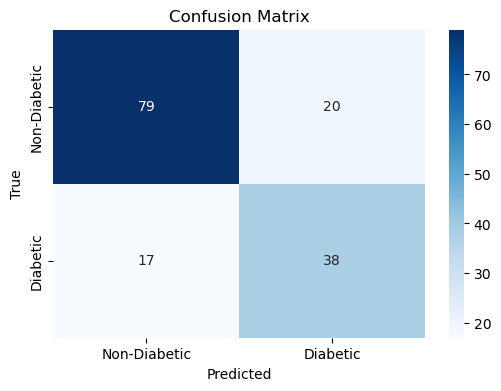

In [39]:
# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

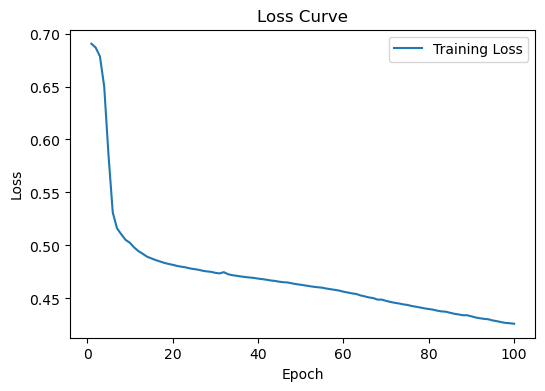

In [41]:
# Plot loss curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(losses) + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()